In [ ]:
'Deployment code is in "Deployment" folder'

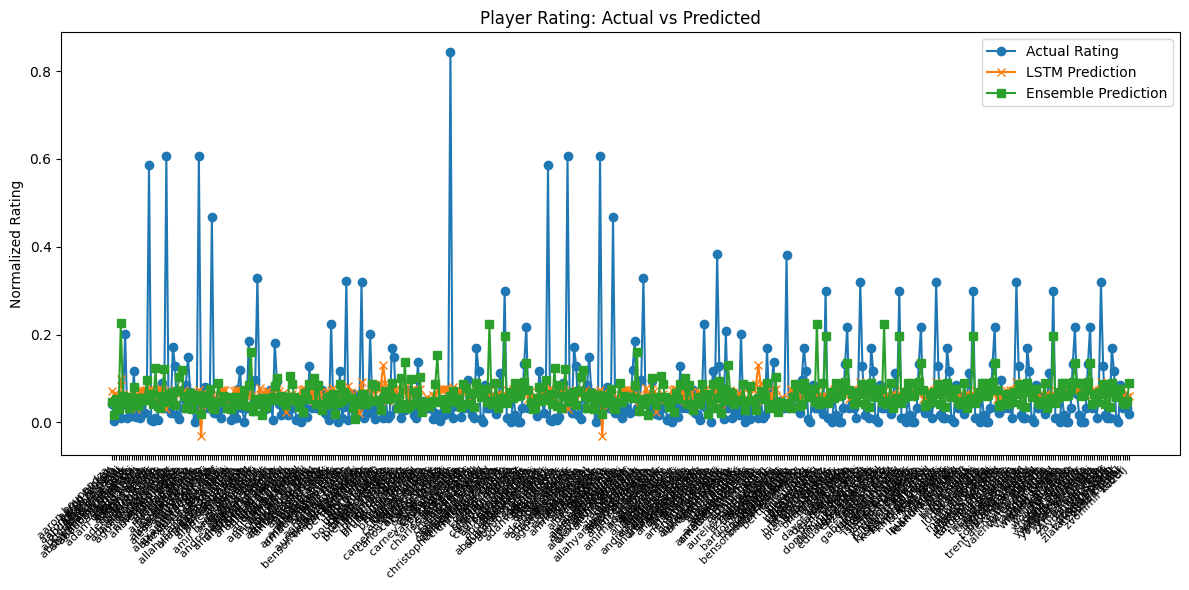

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Player Name'], df['y_test'], label='Actual Rating', marker='o')
plt.plot(df['Player Name'], df['lstm_preds'], label='LSTM Prediction', marker='x')
plt.plot(df['Player Name'], df['ensemble_preds'], label='Ensemble Prediction', marker='s')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Player Rating: Actual vs Predicted", fontsize=12)
plt.ylabel("Normalized Rating", fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("rating_comparison.png")
plt.show()

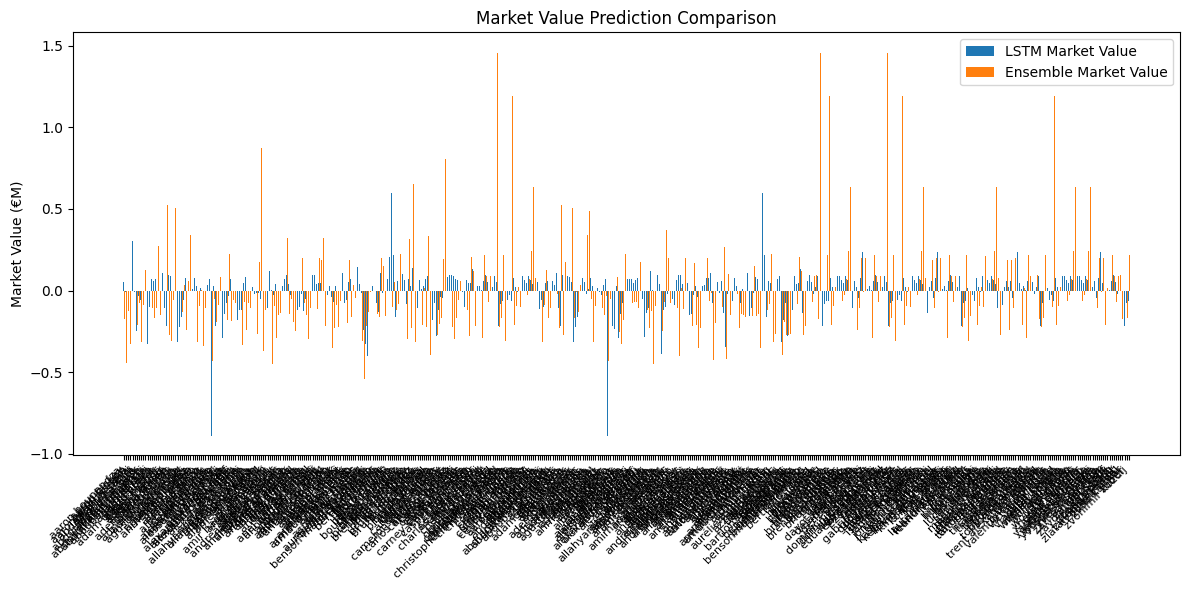

In [7]:
x = np.arange(len(df))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df['lstm_market_value'], width, label='LSTM Market Value')
plt.bar(x + width/2, df['ensemble_market_value'], width, label='Ensemble Market Value')
plt.xticks(x, df['Player Name'], rotation=45, ha='right', fontsize=8)
plt.title("Market Value Prediction Comparison", fontsize=12)
plt.ylabel("Market Value (€M)", fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("market_value_comparison.png")
plt.show()

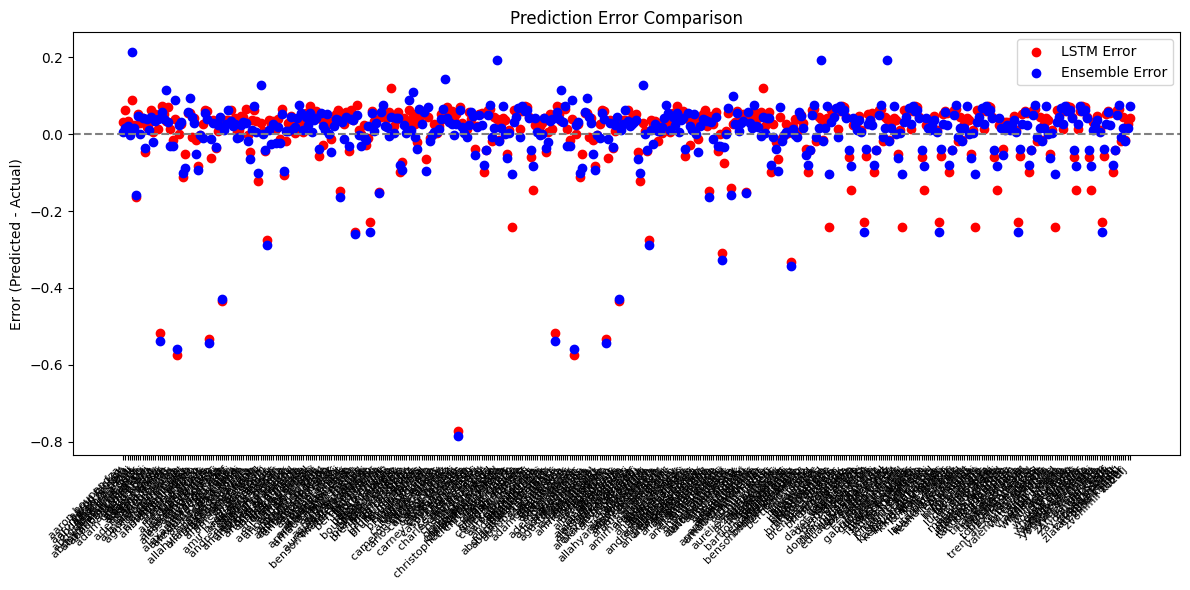

In [8]:
df['lstm_error'] = df['lstm_preds'] - df['y_test']
df['ensemble_error'] = df['ensemble_preds'] - df['y_test']

plt.figure(figsize=(12, 6))
plt.scatter(df['Player Name'], df['lstm_error'], label='LSTM Error', color='red')
plt.scatter(df['Player Name'], df['ensemble_error'], label='Ensemble Error', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title("Prediction Error Comparison", fontsize=12)
plt.ylabel("Error (Predicted - Actual)", fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("prediction_error_comparison.png")
plt.show()

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("player_prediction_comparisons.pdf") as pdf:
    for fig_name in ["rating_comparison.png", "market_value_comparison.png", "prediction_error_comparison.png"]:
        img = plt.imread(fig_name)
        plt.figure(figsize=(12, 6))
        plt.imshow(img)
        plt.axis('off')
        pdf.savefig()
        plt.close()